## Algorithm Overview
In this notebook, we employ **Neural Network**


### Model Architecture:
- **Input Layer:** Matches the number of features in the dataset.
- **Hidden Layers:**
  - Three hidden layers with 100, 50, and 25 neurons respectively.
  - **Activation function:** ReLU (Rectified Linear Unit) for introducing non-linearity.
- **Output Layer:**
  - 4 neurons, corresponding to the number of classes.
  - **Activation function:** Softmax, for outputting a probability distribution across the classes.

### Regularization and Dropout:
- **L2 Regularization:** Lambda value of 0.1 in each hidden layer to help reduce overfitting by penalizing large weights.
- **Dropout:** 10% dropout rate after each hidden layer to prevent overfitting by randomly setting output features of hidden units to zero during training.

### Batch Normalization:
- Applied after each dropout layer to normalize the activations, helping in stabilizing the learning process and improving training speed.

### Training Parameters:
- **Optimizer:** Adam, with a learning rate of 0.0001.
- **Loss Function:** Categorical Crossentropy, suitable for multi-class classification tasks.
- **Metrics:** Accuracy, Recall, and a custom F1 Score metric to assess both precision and recall aspects of model performance.

### Training Strategy:
- The model is trained over 100 epochs with a batch size of 32. This setup aims to balance the training efficiency and the model's ability to generalize, with periodic evaluations on a validation set to monitor performance and adjust if necessary.


In [60]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [61]:
train_data = pd.read_csv('Final_Version_data_breast.csv')
test_data = pd.read_csv('Test_Set.csv')

X_train = train_data.drop('cancer_type', axis=1)
y_train = train_data['cancer_type']

X_test = test_data.drop('cancer_type', axis=1)
y_test = test_data['cancer_type']

y_test_counts = y_test.value_counts()
print("y_test value counts:")
print(y_test_counts)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_test value counts:
cancer_type
0    259
3    248
2    228
1    225
Name: count, dtype: int64


In [62]:

y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Dense(25, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.BatchNormalization(),   

    tf.keras.layers.Dense(4, activation='softmax')
])

In [63]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.argmax(y_pred, axis=-1)
        y_true = tf.argmax(y_true, axis=-1)
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()


In [64]:
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy', tf.keras.metrics.Recall(), F1Score()]
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test)
)

model.evaluate(X_test,y_test)

y_pred = model.predict(X_test)
#y_pred_classes = np.argmax(y_pred, axis=1)
#y_pred_classes


Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2851 - f1_score: 0.7457 - loss: 15.0422 - recall_16: 0.1683 - val_accuracy: 0.2656 - val_f1_score: 0.7618 - val_loss: 13.8543 - val_recall_16: 0.0000e+00
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - f1_score: 0.7795 - loss: 13.8097 - recall_16: 0.1751 - val_accuracy: 0.3396 - val_f1_score: 0.8018 - val_loss: 12.7486 - val_recall_16: 0.0083
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3707 - f1_score: 0.7842 - loss: 12.6128 - recall_16: 0.2203 - val_accuracy: 0.4010 - val_f1_score: 0.8354 - val_loss: 11.6918 - val_recall_16: 0.0760
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4058 - f1_score: 0.8092 - loss: 11.5811 - recall_16: 0.2579 - val_accuracy: 0.4823 - val_f1_score: 0.8491 - val_loss: 10.6989 - val_recall_16: 0.1896
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4131 - f1_score: 0.8034 - loss: 10.6404 - recall_16: 0.2536 -

## Model Evaluation and Visualization

In this section, we visually assess the model's performance using various metrics and plots:

- **Training and Validation Loss & Accuracy**: Plots to visualize the model's learning progress over the epochs for both the training and validation phases. These graphs help identify trends such as overfitting or underfitting.

- **Confusion Matrix**: Provides a detailed view of the model's classification accuracy across all classes, highlighting which classes are more frequently confused with others.

By examining these visualizations, we can better understand the strengths and weaknesses of our model, guiding any necessary adjustments to improve performance.


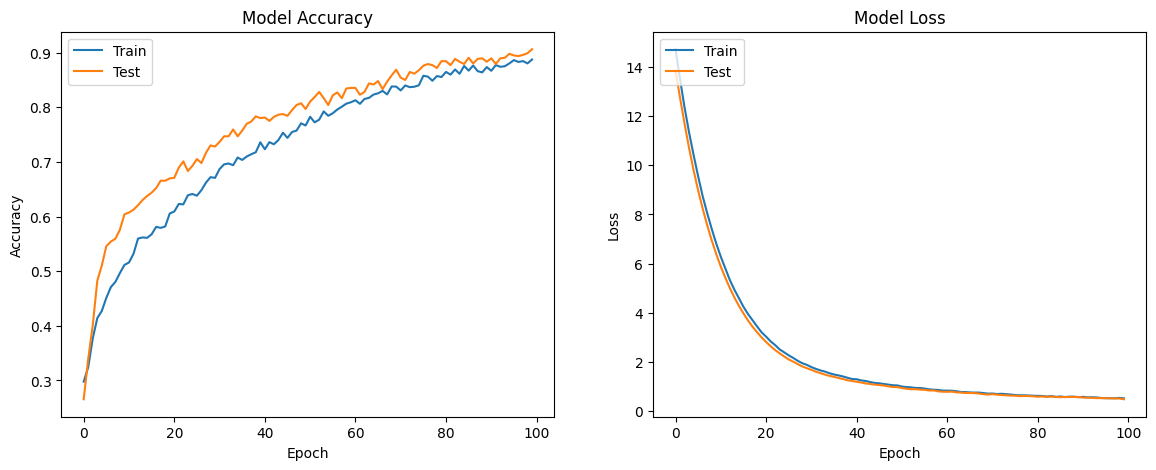

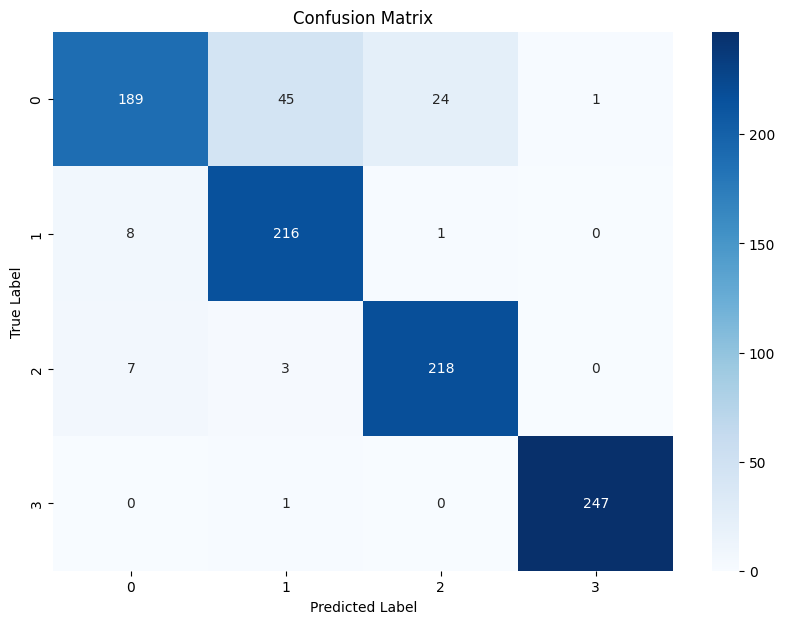

In [65]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()